In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [95]:
df=pd.read_csv("tele_churn.csv")

In [96]:
df1=df.copy()

In [97]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [98]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<B>CHECKING FOR THE NULLS

In [99]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No-nulls can be seen as of now and dataset looks healthy!!

In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


DATA TYPES ARE OF 2 TYPES:<BR>
    OBJECT<BR>
    INT<BR>

<b> Separating continuos and categorical data

In [101]:
#cont_col=[] for continuous dataset
#cat_col=[] for categorical columns
cont_col=[]
cat_col=[]

In [102]:
for i in df1.columns:
    if(df1[i].dtypes=='O'):
        cat_col.append(i)
    else:
        cont_col.append(i)

In [103]:
print(f'CATEGORICAL COLUMNS ARE AS FOLLOWS --{cat_col}')
print(f'\n\nCONTINUOS COLUMNS ARE AS FOLLOWS--{cont_col}')

CATEGORICAL COLUMNS ARE AS FOLLOWS --['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


CONTINUOS COLUMNS ARE AS FOLLOWS--['SeniorCitizen', 'tenure', 'MonthlyCharges']


IT CAN BE OBSERVED THAT TOTALCHARGES ARE IN CATEGORICAL COLUMN WHICH SHOULD BE A CONTINUOS DATA AND WE HAVE TO CHANGE ITS TYPE!!

<B>DIFFERENT CATEGORIES IN CATEGORICAL COLUMNS

In [104]:
name=[]
uni=[]
cate=[]

In [105]:
for i in cat_col:
    name.append(i)
    uni.append(len(df1[i].unique()))
    cate.append(df1[i].unique())

In [106]:
inf=pd.DataFrame({"NAME":name,"UNIQUE CQATEGORIES":uni,"CATEGORIES":cate})

In [107]:
inf

,NAME,UNIQUE CQATEGORIES,CATEGORIES
0,customerID,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,2,"[Female, Male]"
2,Partner,2,"[Yes, No]"
3,Dependents,2,"[No, Yes]"
4,PhoneService,2,"[No, Yes]"
5,MultipleLines,3,"[No phone service, No, Yes]"
6,InternetService,3,"[DSL, Fiber optic, No]"
7,OnlineSecurity,3,"[No, Yes, No internet service]"
8,OnlineBackup,3,"[Yes, No, No internet service]"
9,DeviceProtection,3,"[No, Yes, No internet service]"


Total charges should be moved to continuos columns list!!<br>
And it should also be taken into consideration that some of the enterie are empty strings<br>

Checking the nulls in TotalCharges!!

In [108]:
df1[df1['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#Total 11 enteries in Total are " "

In [109]:
df1['TotalCharges']=df1['TotalCharges'].replace(' ',np.nan)

In [110]:
df1['TotalCharges']=df1['TotalCharges'].astype(float)

CHECKING FOR THE NULLS AGAIN!!

In [111]:
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It can be clearly seen that total charges have 11 nulls and have to be treated suitably!!!!

loss in percent if we drop the nulls in 'TotalCharges'

In [112]:
print(f'LOSS IN PERCENTAGE if WE DROP THE NULLS IN TOTAL CHARGES --{1-round((7043-11)/7043,3)}%')

LOSS IN PERCENTAGE if WE DROP THE NULLS IN TOTAL CHARGES --0.0020000000000000018%


SINCE THE LOSS IS NOT EVEN OF 1 PERCENT WE WILL DROP NULLS IN TotalCharges COLUMN!!

In [113]:
df1.dropna(subset=['TotalCharges'],axis=0,inplace=True)

In [114]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

REMOVED ALL THE NULLS SUCCESSFULL!!

In [115]:
cont_col.append('TotalCharges')

In [116]:
cat_col.remove('TotalCharges')

<B>DESCRIBING THE DATA(CONTINUOS COLUMNS)

In [117]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


TotalCharges if having a very large standarddeviation which shows a very wide spread of the data around the mean<br>
Further clearity will be from the distribution plots and box plots

<B>HEATMAP FOR CONTINUOS DATA DESCRIPTION

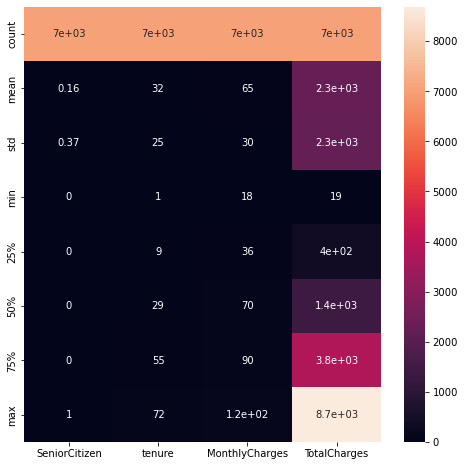

In [118]:
plt.figure(figsize=(8,8))
sns.heatmap(df1.describe(),annot=True,annot_kws={'size':10})
plt.show()

<B>CATEGORICAL DATA DESCRIPTION

In [119]:
df1.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


A DATAFRAME DESCRIBING THE CATEGORICAL COLUMNS !! 

<B>CHECKING THE CORRELATION AMONG THE FEATURES 

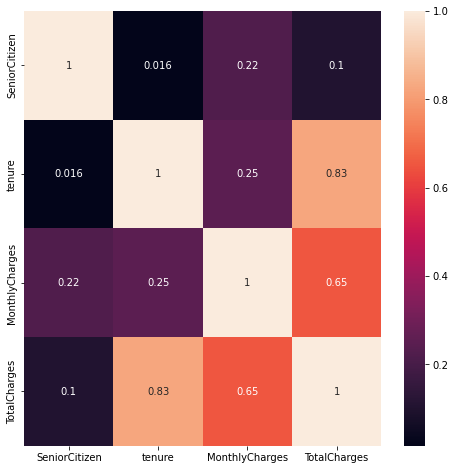

In [120]:
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(),annot=True,annot_kws={"size":10})
plt.show()

It can be noted that TotalCharges are highly influenced with the tenure a customer opt for !!<br>
Its quiet obvious that monthlycharges affect the TotalCharges and show a good correlaton of 0.65!!

Analysis of different features and plots about various relationships
----------------

<B>CHECKING IF OUR LABEL (Churn) IS BALANCED OR NOT!!

In [121]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Since counts of both who churned and who dint are present in suitable quantity we dont have to balance the dataset externally!!

In [122]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<B>GENDER AS A FEATURES

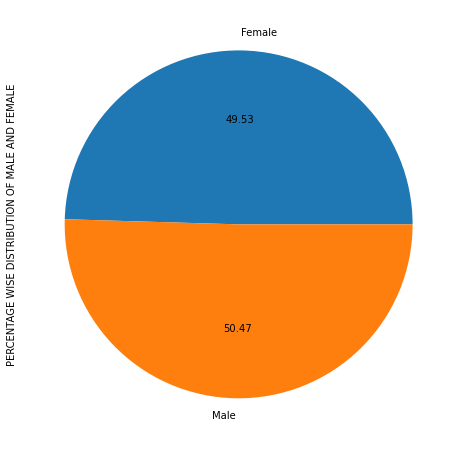

In [123]:
plt.figure(figsize=(8,8))
df1.groupby('gender').size().plot(kind='pie',autopct='%.2f', textprops={'fontsize': 10})
plt.ylabel("PERCENTAGE WISE DISTRIBUTION OF MALE AND FEMALE")
plt.show()

BOTH FEMALE AND MALE ARE EQUALLY DISTRIBUTED IN THE CUSTOMER POPULATION <BR>
IT WILL HELP IN A NON BIASED GENDER BASED OBSERVATIONS!!

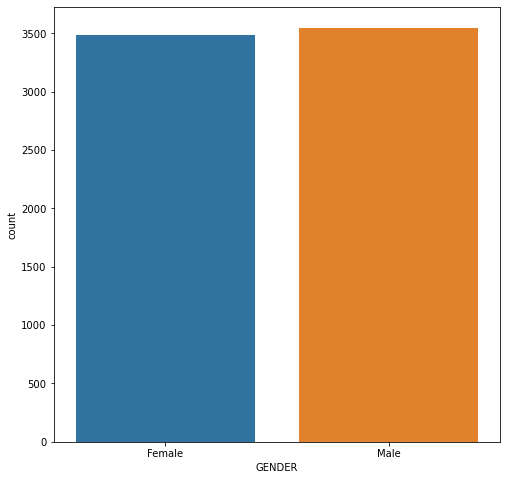

In [124]:
plt.figure(figsize=(8,8))
sns.countplot(x=df1['gender'])
plt.xlabel('GENDER')
plt.show()

In [125]:
tt=df1.groupby(['gender']).sum()

In [126]:
tt['gender']=tt.index

In [127]:
tt

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender
gender,,,,,
Female,568,112469,227149.6,7952354.2,Female
Male,574,115521,228511.4,8103814.5,Male


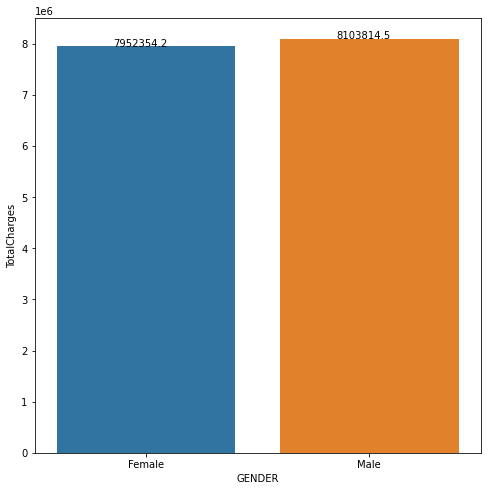

In [128]:
plt.figure(figsize=(8,8))
ax=sns.barplot(x=tt['gender'],y=tt['TotalCharges'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel('GENDER')
plt.show()

WHEN IT COMES TO CUMULATIVE TOTAL CHARGES MALEs are found to have a slightly greater sum as compared to females<br>
Though not much difference between the two  depicts that both males and females contribute almost equally when its comes to expenditure bills on telecom services<br>

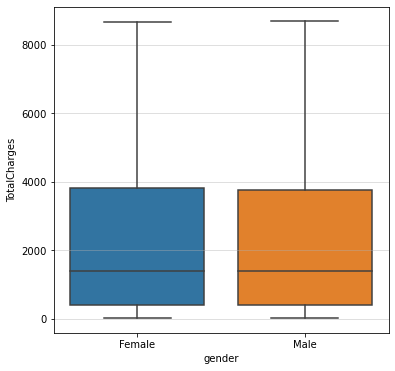

In [129]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.boxplot(x=df1['gender'],y=df1['TotalCharges'])
plt.show()

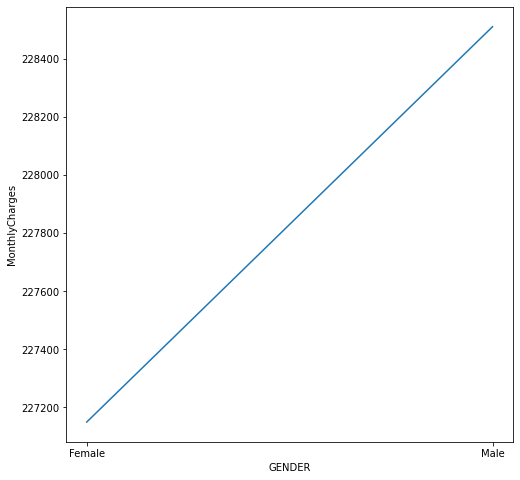

In [130]:
plt.figure(figsize=(8,8))
ax=sns.lineplot(x=tt['gender'],y=tt['MonthlyCharges'])
plt.xlabel('GENDER')
plt.show()

Monthly expenditure by males is found significantly  higher than females<br>


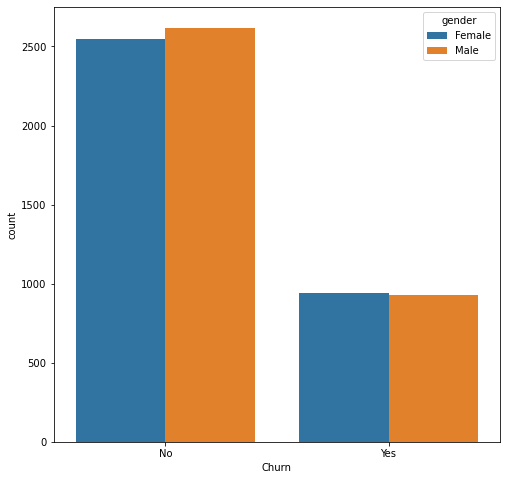

In [131]:
plt.figure(figsize=(8,8))
sns.countplot(x=df1['Churn'],hue=df1['gender'])
plt.show()

WHEN IT COMES TO CHURNING BOTH MALES AND FEMALES ARE EQUALLY LIKELY TO CHURN A SERVICE PROVIDER!!

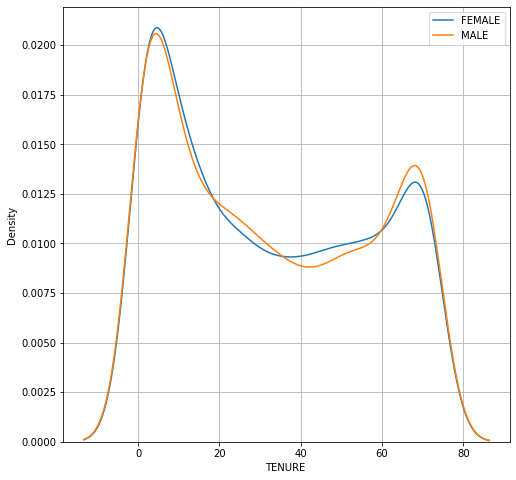

In [132]:
plt.figure(figsize=(8,8))
sns.kdeplot(df1.loc[df1['gender']=='Female','tenure'],label='FEMALE')
sns.kdeplot(df1.loc[df1['gender']=='Male','tenure'],label='MALE')
plt.xlabel("TENURE ")
plt.grid(True)
plt.legend()
plt.show()

WHEN IT COMES TO TENURE BOTH SHOW ALMOST SAME PATTERNS WITH LOWER TENURES HAVING THE HIGHEST DENSITY AND GRADUAL DECREASE IN THE DENSITY AS THE TENURE INCREASES WITH A LOCAL MINIMA AROUND 70 

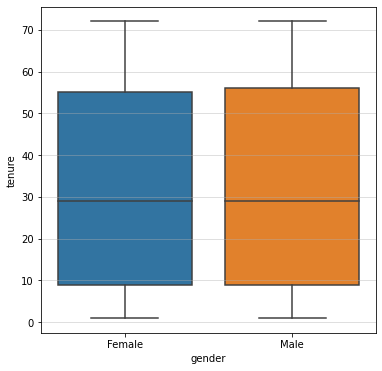

In [133]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.boxplot(x=df1['gender'],y=df1['tenure'])
plt.show()

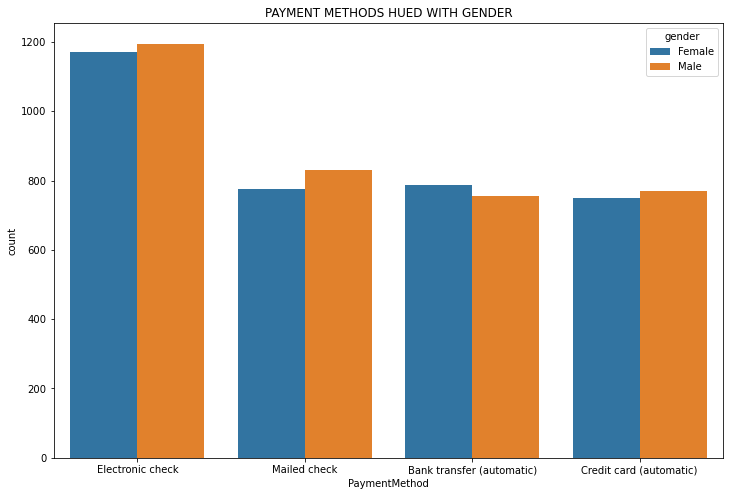

In [134]:
plt.figure(figsize=(12,8))
sns.countplot(x=df1['PaymentMethod'],hue=df1['gender'])
plt.title("PAYMENT METHODS HUED WITH GENDER")
plt.show()

BankTransfer(automatic) is the payment method in which females are at a lead else in all the methods males dominate 

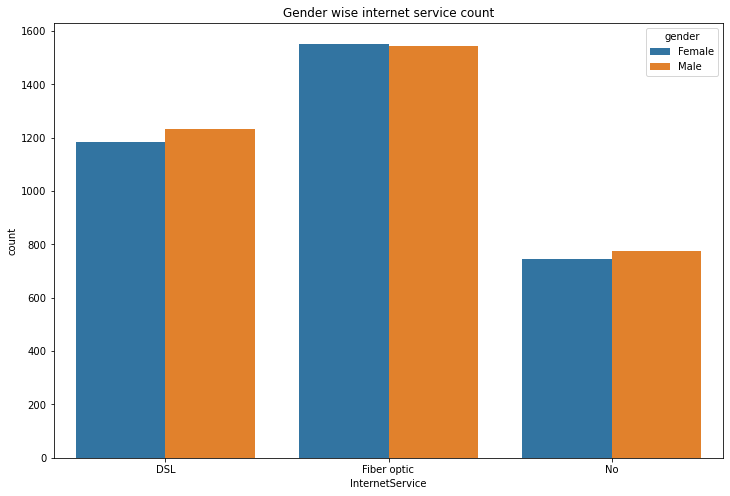

In [135]:
plt.figure(figsize=(12,8))
sns.countplot(x=df1['InternetService'],hue=df1['gender'])
plt.title("Gender wise internet service count")
plt.show()

AROUND 1200 WOMEN PREFER DIGITAL SERVICE LINES WHEN IT COMES TO INTERNET SERVICE<BR>
COUNT OF THOSE USING A FIBER OPTIC CONNECTION IS  MAXIMUM  AMONG ANY CATEGORY WITH NUMBER  OF FEMALE USING FIBER OPTICS BEING SLIGHTLY HIGHER!!

In [136]:
stream=['StreamingTV','StreamingMovies']

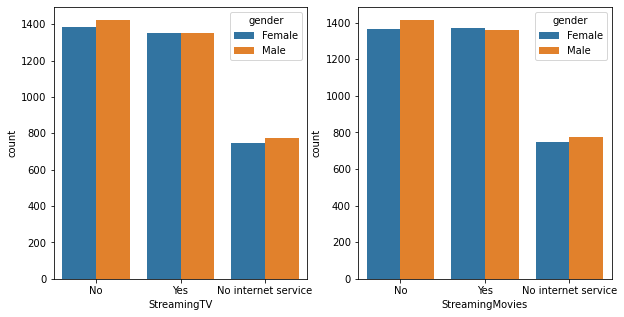

In [137]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df1['StreamingTV'],hue=df1['gender'])
plt.subplot(1,2,2)
sns.countplot(x=df1['StreamingMovies'],hue=df1['gender'])
plt.show()

No major difference can be seen between the two genders when it comes to streaming TV and streaming Movies 

<B>SENIOR-CITIZENS

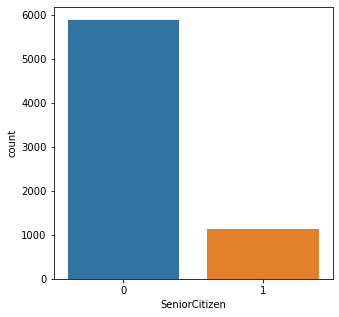

In [138]:
plt.figure(figsize=(5,5))
sns.countplot(x=df1['SeniorCitizen'])
plt.show()

Most of the customers of the telecom are among the younger generation !!<br>
Senior citizens interaticion with the technology being not that advance as with the youth might be one of the reasons for low customer count in senior citizen category 


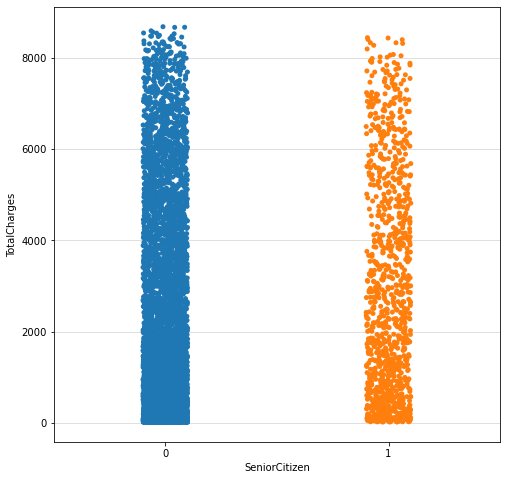

In [139]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.stripplot(x=df1['SeniorCitizen'],y=df1['TotalCharges'])
plt.show()

Younger generations are found to expend more when it comes to total expenditure on telecom service providers!!

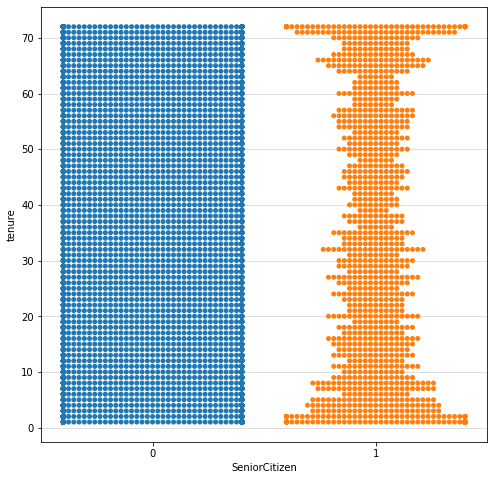

In [140]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.swarmplot(x=df1['SeniorCitizen'],y=df1['tenure'])
plt.show()

A more uniform and stable region can be observed under non-seniorcitizen region depctiing a more active indulgence of the youth in plans of all tenures

<B>HOW HAVING DEPENDENTS AFFECT THE FEATURES AND CHURN RATE

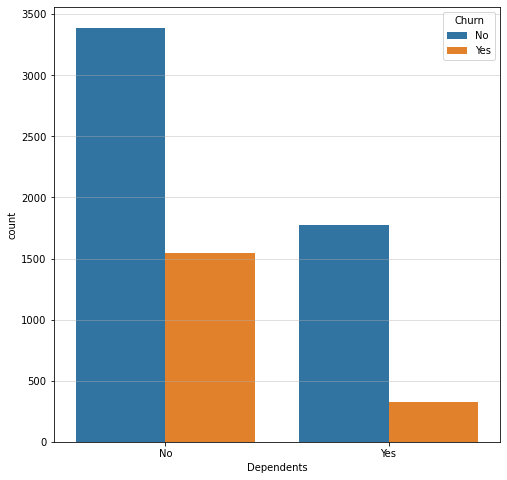

In [141]:
plt.figure(figsize=(8,8))
plt.grid(True,alpha=0.5)
sns.countplot(x=df1['Dependents'],hue=df1['Churn'])
plt.show()

Those having dependents tends to churn less as compared to singles!!<br>
Less count of those having dependents might be one of the reason for this huge difference!!

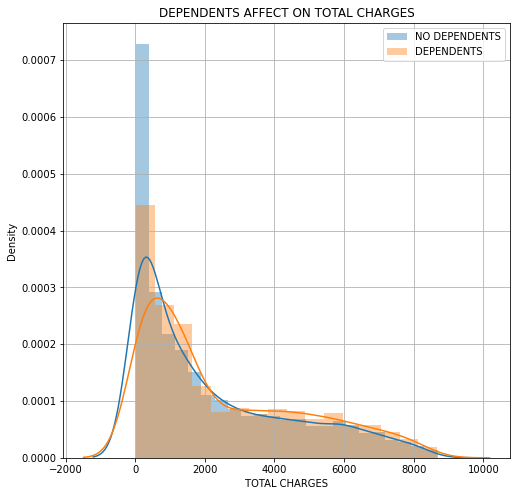

In [142]:
plt.figure(figsize=(8,8))
sns.distplot(df1.loc[df1['Dependents']=='No','TotalCharges'],label='NO DEPENDENTS')
sns.distplot(df1.loc[df1['Dependents']=='Yes','TotalCharges'],label='DEPENDENTS')
plt.xlabel(" TOTAL CHARGES ")
plt.title("DEPENDENTS AFFECT ON TOTAL CHARGES")
plt.grid(True)
plt.legend()
plt.show()

In [143]:
print(f'MEAN OF TOTAL CHARGES WHEN HAVING DEPENDENTS {round(df1.groupby(by="Dependents").mean()["TotalCharges"].iloc[1],2)}')
print(f'MEAN OF TOTAL CHARGES WHEN HAVING NO DEPENDENTS {round(df1.groupby(by="Dependents").mean()["TotalCharges"].iloc[0],2)}')

MEAN OF TOTAL CHARGES WHEN HAVING DEPENDENTS 2507.96
MEAN OF TOTAL CHARGES WHEN HAVING NO DEPENDENTS 2187.71


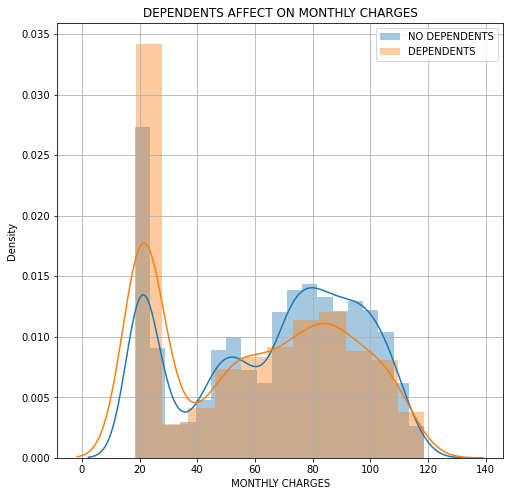

In [144]:
plt.figure(figsize=(8,8))
sns.distplot(df1.loc[df1['Dependents']=='No','MonthlyCharges'],label='NO DEPENDENTS')
sns.distplot(df1.loc[df1['Dependents']=='Yes','MonthlyCharges'],label='DEPENDENTS')
plt.xlabel(" MONTHLY CHARGES ")
plt.title("DEPENDENTS AFFECT ON MONTHLY CHARGES")
plt.grid(True)
plt.legend()
plt.show()

In [145]:
print(f'MEAN OF TOTAL CHARGES WHEN HAVING DEPENDENTS {round(df1.groupby(by="Dependents").mean()["MonthlyCharges"].iloc[1],2)}')
print(f'MEAN OF TOTAL CHARGES WHEN HAVING NO DEPENDENTS {round(df1.groupby(by="Dependents").mean()["MonthlyCharges"].iloc[0],2)}')

MEAN OF TOTAL CHARGES WHEN HAVING DEPENDENTS 59.62
MEAN OF TOTAL CHARGES WHEN HAVING NO DEPENDENTS 67.0


ITS VERY CLEAR FROM THE DISTRIBUTION THAT<BR>
THE DENSITY FOR THOSE WHO DONT HAVE ANY DEPENDENTS IS FOUND TO BE GREATER AFTER THE MONTHLY CHARGES EXCEEDS 40!!<BR>


<B>PhoneService

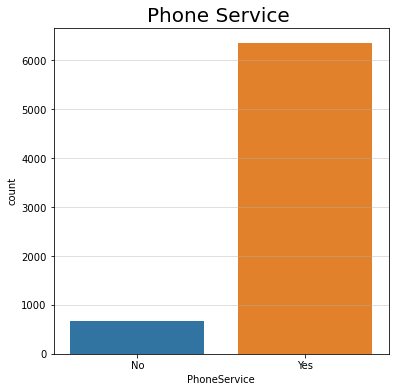

In [146]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.countplot(x=df1['PhoneService'])
plt.title("Phone Service ",fontsize=20)
plt.show()

Most customers can be seen having the phone service with their plans<br>


<b>MultipleLines

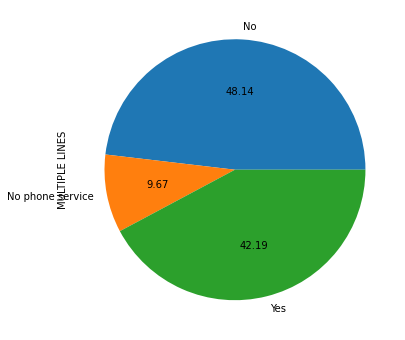

In [147]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
df1.groupby(['MultipleLines']).size().plot(kind='pie',autopct='%.2f')
plt.ylabel("MULTIPLE LINES")
plt.show()

Around 48% of the customers can be seen opting for the single line<br>
Around 42.19 % of the customers can be seen opting for the multiple lines<br>
Around 9.67% of the customers are having no phone service!!

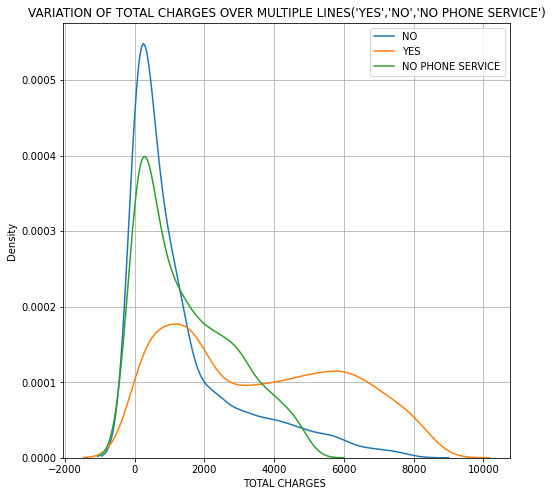

In [148]:
plt.figure(figsize=(8,8))
sns.kdeplot(df1.loc[df1['MultipleLines']=='No','TotalCharges'],label='NO ')
sns.kdeplot(df1.loc[df1['MultipleLines']=='Yes','TotalCharges'],label='YES')
sns.kdeplot(df1.loc[df1['MultipleLines']=='No phone service','TotalCharges'],label='NO PHONE SERVICE')
plt.xlabel("TOTAL CHARGES ")
plt.title("VARIATION OF TOTAL CHARGES OVER MULTIPLE LINES('YES','NO','NO PHONE SERVICE')")
plt.grid(True)
plt.legend()
plt.show()

THOSE OPTING FOR MULTIPLE LINES TENDS TO HAVE DENSER REGIONS AS THE TOTAL CHARGES INCREASES!!<BR>


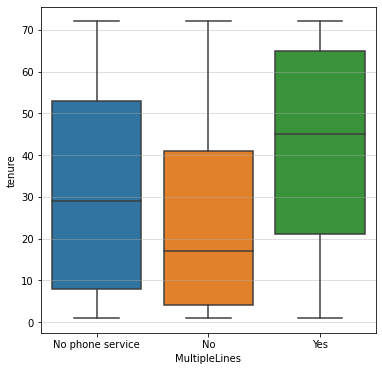

In [149]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.boxplot(x=df1['MultipleLines'],y=df1['tenure'])
plt.show()

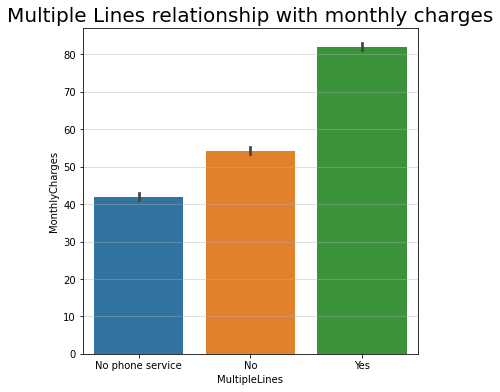

In [150]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.barplot(x=df1['MultipleLines'],y=df1['MonthlyCharges'])
plt.title("Multiple Lines relationship with monthly charges",fontsize=20)
plt.show()

MONTHLY CHARGES SHOW A INCREASING TREND FROM NO PHONE SERVICE TO those opting for multiple lines in a gradual manner!!

<b> ONLINE SECURITY!!

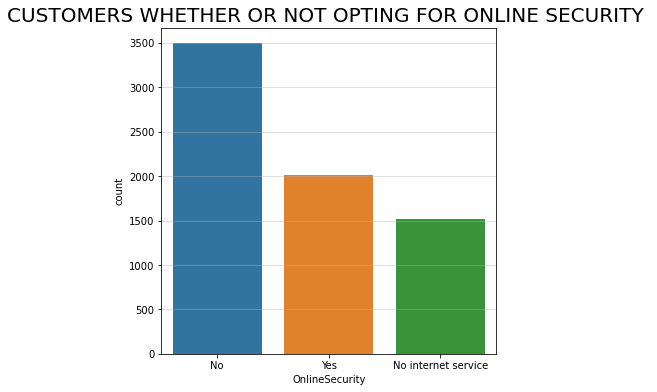

In [151]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.countplot(x=df1['OnlineSecurity'])
plt.title("CUSTOMERS WHETHER OR NOT OPTING FOR ONLINE SECURITY ",fontsize=20)
plt.show()

The majority of the customers dont opt for online security!!<<BR>
INCREASED PRICES MAY BE THE REASON BEHIND THIS<BR>
AROUND 2000 CUSTOMERS FROM THE DATASET TENDS TO PAY FOR THE ONLINE SECURITY<BR>
AROUND 1500 CUSTOMERS HAVE NO INTERNET SERVICE AND CANT BE TAKEN INTO CONSIDERATION FOR ONLINE SECURITY!

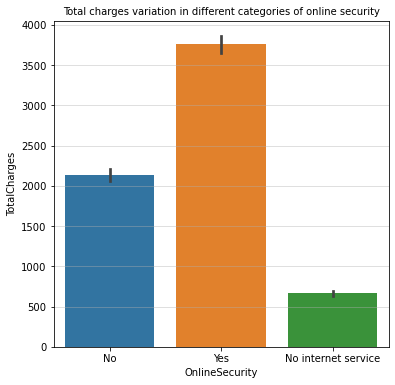

In [152]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.barplot(x=df1['OnlineSecurity'],y=df1['TotalCharges'])
plt.title("Total charges variation in different categories of online security",fontsize=10)
plt.show()

Those opting for online security can be seen more total charges as compared to those who dont have online security!!

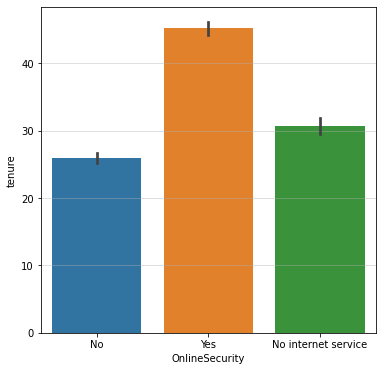

In [153]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.barplot(x=df1['OnlineSecurity'],y=df1['tenure'])
plt.show()

Those who opt for online security tends to take the plans of extended tenure!!<br>


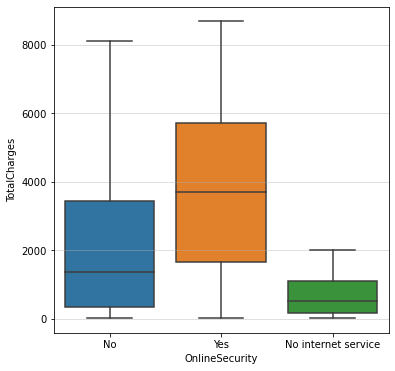

In [154]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.boxplot(x=df1['OnlineSecurity'],y=df1['TotalCharges'])
plt.show()

No outliers can be seen over different categories of online security !

<B>HOW MUCH PART OF POPULATION IS HAVING A ONLINE BACKUP!!


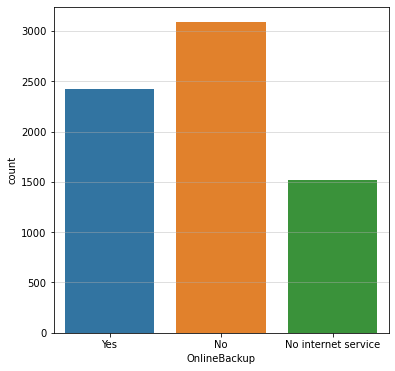

In [155]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.countplot(x=df1['OnlineBackup'])
plt.show()

Majority of the customers dont opt for OnlineBackups<br>
High Pricing and less knowledge about the benefits can be the reason for this!<br>
Around 2400 customers from the population can be seen opting which is a significant amount<br>
Around 1500 customers have no valid internet plan

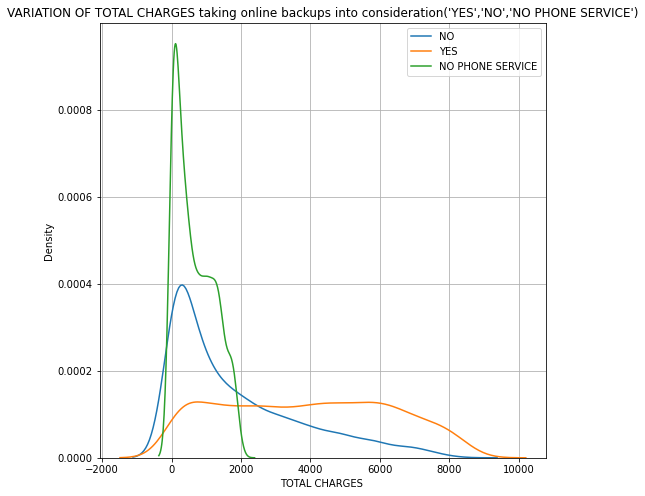

In [156]:
plt.figure(figsize=(8,8))
sns.kdeplot(df1.loc[df1['OnlineBackup']=='No','TotalCharges'],label='NO ')
sns.kdeplot(df1.loc[df1['OnlineBackup']=='Yes','TotalCharges'],label='YES')
sns.kdeplot(df1.loc[df1['OnlineBackup']=='No internet service','TotalCharges'],label='NO PHONE SERVICE')
plt.xlabel("TOTAL CHARGES ")
plt.title("VARIATION OF TOTAL CHARGES taking online backups into consideration('YES','NO','NO PHONE SERVICE')")
plt.grid(True)
plt.legend()
plt.show()

Though the density of those opting for online backup is less but the spread over the total charges is greater than any other category!!

<B>DEVICE PROTECTION

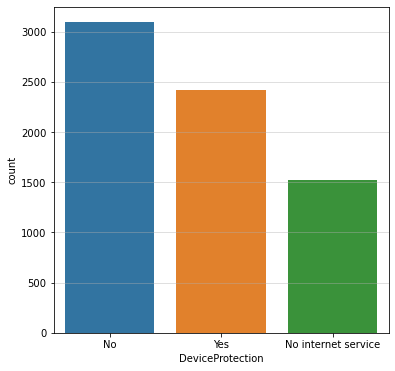

In [157]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.countplot(x=df1['DeviceProtection'])
plt.show()

Its quiet obvious people are often trying to save as much money as they can especially the younger ones!!<br>
Saving some money on things like DeviceProtection and OnlineSecurity is most common across the population

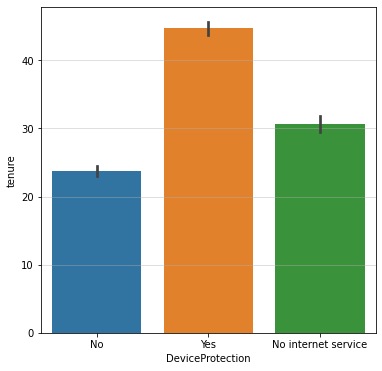

In [158]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.barplot(x=df1['DeviceProtection'],y=df1['tenure'])
plt.show()

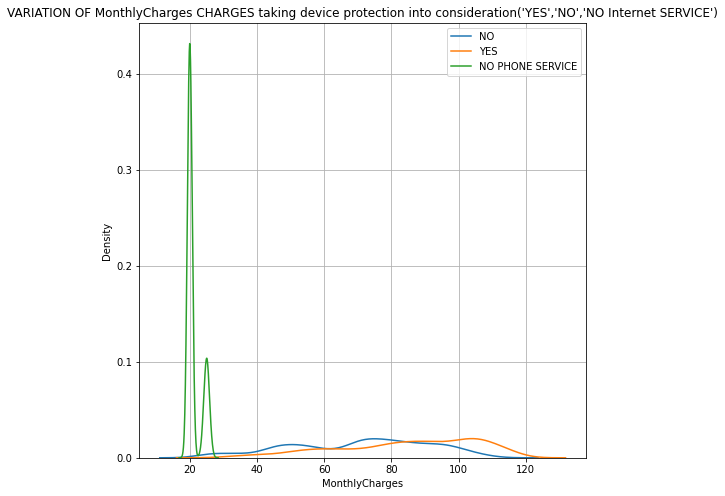

In [159]:
plt.figure(figsize=(8,8))
sns.kdeplot(df1.loc[df1['DeviceProtection']=='No','MonthlyCharges'],label='NO ')
sns.kdeplot(df1.loc[df1['DeviceProtection']=='Yes','MonthlyCharges'],label='YES')
sns.kdeplot(df1.loc[df1['DeviceProtection']=='No internet service','MonthlyCharges'],label='NO PHONE SERVICE')
plt.xlabel("MonthlyCharges")
plt.title("VARIATION OF MonthlyCharges CHARGES taking device protection into consideration('YES','NO','NO Internet SERVICE')")
plt.grid(True)
plt.legend()
plt.show()

Lower densities for those who opt for Device Protection but spread is quiet high when

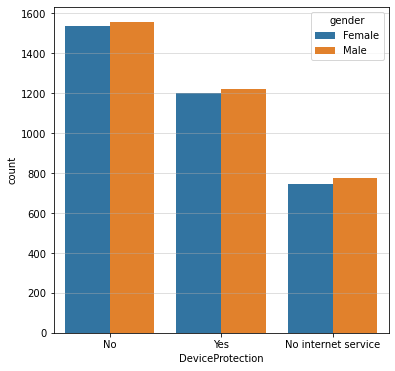

In [160]:
plt.figure(figsize=(6,6))
plt.grid(True,alpha=0.5)
sns.countplot(x=df1['DeviceProtection'],hue=df1['gender'])
plt.show()

Equally-likely when it comes to device protection among the female and males!!

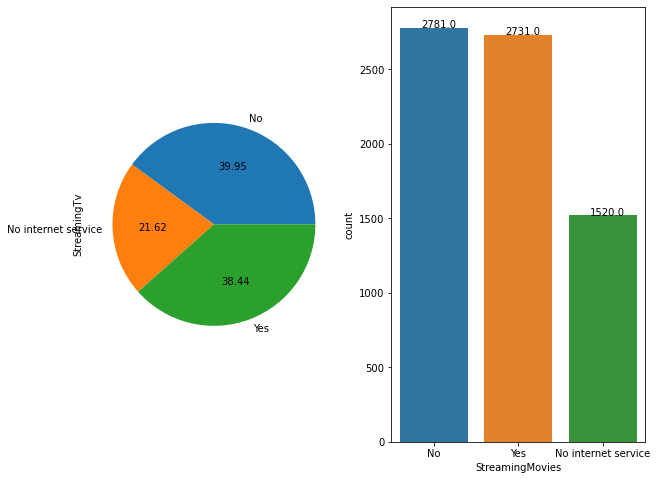

In [161]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df1.groupby('StreamingTV').size().plot(kind='pie',autopct='%.2f')
plt.ylabel("StreamingTv")
plt.subplot(1,2,2)
ax=sns.countplot(x=df1['StreamingMovies'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Both those who StreamTV and StreamMovies and who dont stream  are almost equal in numbers!!<br>
Though a very significant amount of customers (1520) dont have internet service only!!

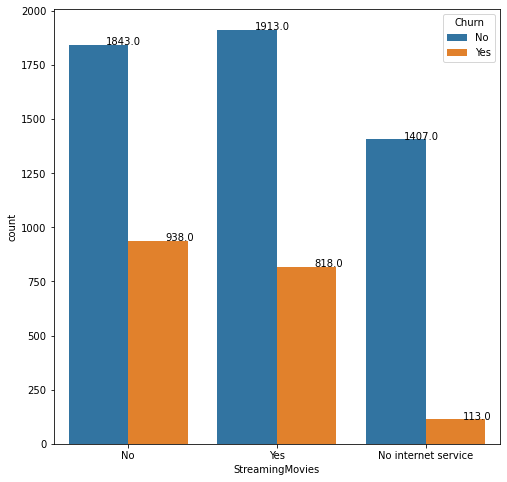

In [162]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df1['StreamingMovies'],hue=df1['Churn'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Out of 1913 customers 818 customers tends to churn <br>
Customers who dont have any internet service have the lowest churn rates!!

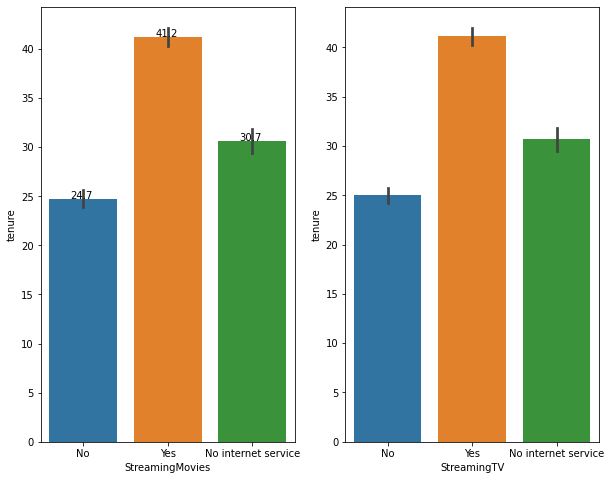

In [163]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
ax=sns.barplot(x=df1['StreamingMovies'],y=df1['tenure'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.subplot(1,2,2)
sns.barplot(x=df1['StreamingTV'],y=df1['tenure'])
plt.show()

Those who streamTV and movies are casually found having the same patterns in choosing the tenures !!
Customers who stream are more likely to opt for longer tenure plans!!

<B>CONTRACT

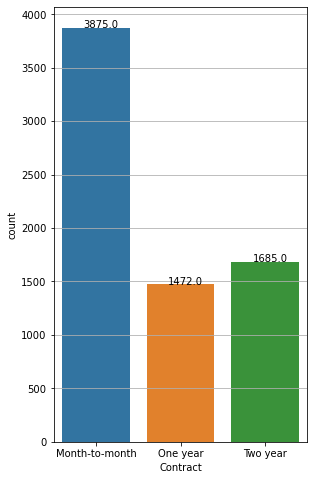

In [164]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.grid(True)
ax=sns.countplot(x=df1['Contract'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Those who renew plans on monthly basis have the highest counts!!<br>
Then comes those who opt for two years plans!!

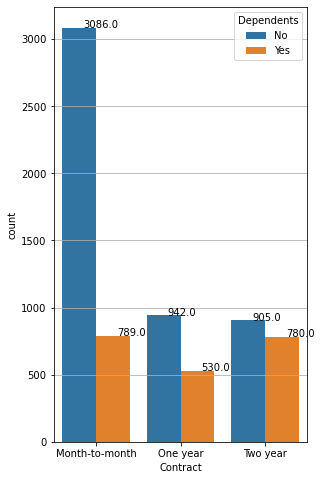

In [165]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.grid(True)
ax=sns.countplot(x=df1['Contract'],hue=df1['Dependents'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Those who have dependents tends to take monthly subscriptions as well as two year plans with equal probability!!<br>
Lower are the counts for those who have only year contract period!

In [166]:
gp=df1.groupby(['Contract']).sum().reset_index()

In [167]:
gp

,Contract,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,Month-to-month,807,69892,257294.15,5305861.5
1,One year,190,61932,95796.90,4467053.5
2,Two year,145,96166,102569.95,6283253.7


In [168]:
gp.sort_values(by='TotalCharges',ascending=False,inplace=True)

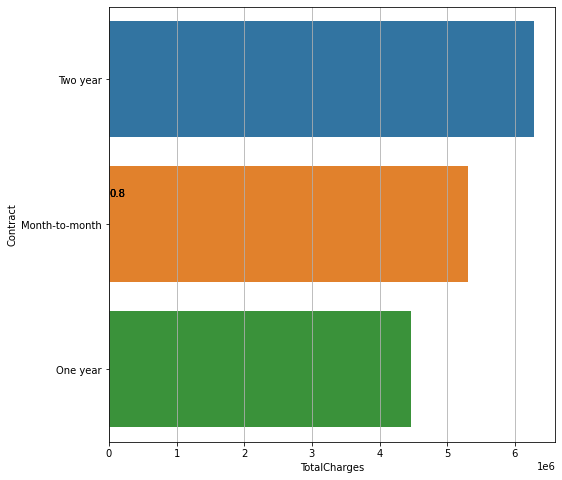

In [169]:
plt.figure(figsize=(8,8))
plt.grid(True)
ax=sns.barplot(y=gp['Contract'],x=gp['TotalCharges'],orient='h')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Maximum revenue is obtained from two year plan followed by monthly subsciption plans!!

In [170]:
gp.sort_values(by='MonthlyCharges',ascending=False,inplace=True)

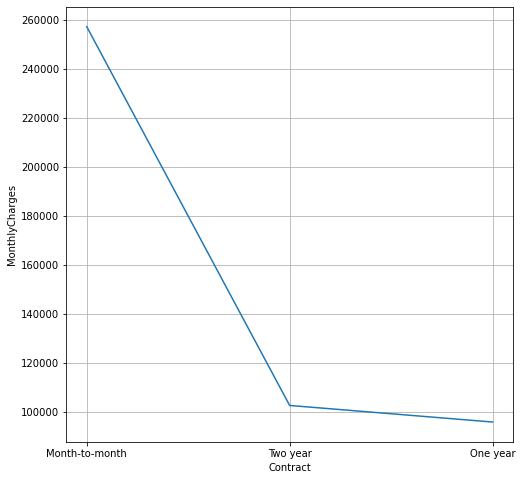

In [171]:
plt.figure(figsize=(8,8))
plt.grid(True)
ax=sns.lineplot(x=gp['Contract'],y=gp['MonthlyCharges'])
plt.show()

It can be inferred that longer periods plans i.e two year and one year have reduced monthly amounts to attract more customers!!<br>
Though those who choose monthly are the 2nd highest revenue generators for the company!!<br>
Indulging  in a longer period plans can save customers a significant amount of money!!<br>

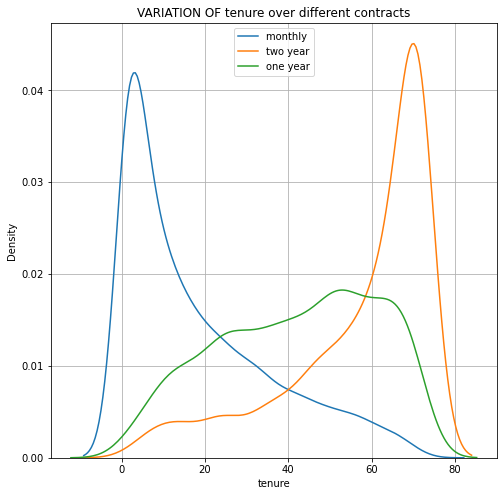

In [172]:
plt.figure(figsize=(8,8))
sns.kdeplot(df1.loc[df1['Contract']=='Month-to-month','tenure'],label='monthly ')
sns.kdeplot(df1.loc[df1['Contract']=='Two year','tenure'],label='two year')
sns.kdeplot(df1.loc[df1['Contract']=='One year','tenure'],label='one year')
plt.xlabel("tenure")
plt.title("VARIATION OF tenure over different contracts")
plt.grid(True)
plt.legend()
plt.show()

Distribution plots for diifferent tenure categories can be seen in the above plot!!<br>


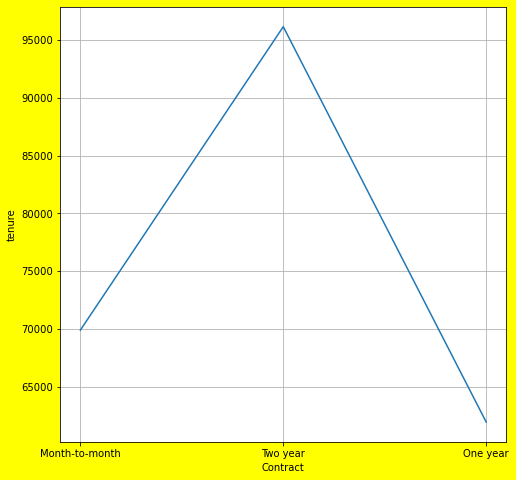

In [173]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
ax=sns.lineplot(x=gp['Contract'],y=gp['tenure'])
plt.show()

Its quiet surprising to know that monthly subscribers are having largerer tenures as compared to one year subscribers!!<br>
Quiet obvious to have two year subscribers will have the highest tenures!!

<B>CHURN 

In [174]:
gc=df1.groupby('Churn').mean().reset_index().iloc[:,[0,2,3,4]]

In [175]:
gc.index=[['No churn','Churned']]

In [176]:
gc

,Churn,tenure,MonthlyCharges,TotalCharges
No churn,No,37.650010,61.307408,2555.344141
Churned,Yes,17.979133,74.441332,1531.796094


In [177]:
gc.sort_values('TotalCharges',ascending=False,inplace=True)

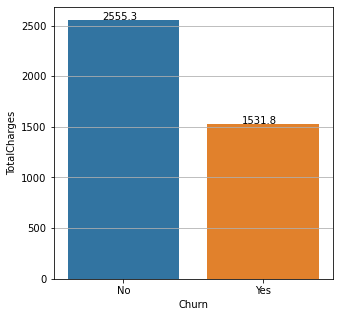

In [178]:
plt.figure(figsize=(5,5))
plt.grid(True)
ax=sns.barplot(x=gc['Churn'],y=gc['TotalCharges'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

IT CAN BE SEEN THAT THOSE WHO STILL REMAINS WITH TELECOM COMPANY AS  A CUSTOMER ARE PAYING HIGH TOTAL CHARGES AS COMPARED TO CHURNED!!


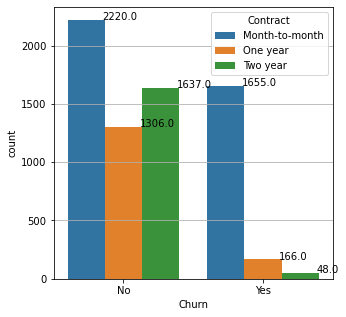

In [179]:
plt.figure(figsize=(5,5))
plt.grid(True)
ax=sns.countplot(x=df1['Churn'],hue=df1['Contract'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Monthly subscribers are among the top when it comes to churning !!<br>
Though they are among the top who dint churn too this may be because of larger counts of month-to-month subs(3875) customers<br>
Those with the 2 year plans stick with the company to a greater extent

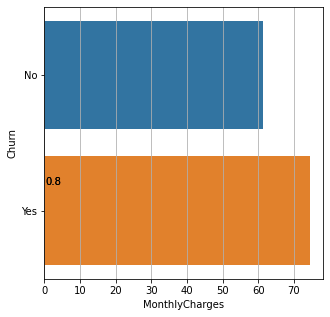

In [180]:
plt.figure(figsize=(5,5))
plt.grid(True)
ax=sns.barplot(y=gc['Churn'],x=gc['MonthlyCharges'],orient='h')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

High monthly charges is among reason for churing !!<br>
Customers do churn to different service providers as the barriers of churning is not that high and market being too competetive in  nature!
Every company must set the monthlycharges in most suitable and economic manner to overcome the competition!!

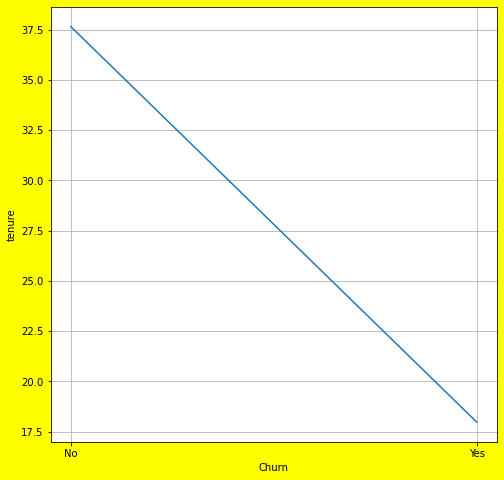

In [181]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
ax=sns.lineplot(x=gc['Churn'],y=gc['tenure'])
plt.show()

Those who churn are having a low tenure with the comapnies!!<br>
If the company is able to stick the customers for longer periods the chances of churning can be brought down considerably!!<br>


In [182]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [183]:
df1.reset_index(inplace=True)

In [185]:
df1.drop(['index'],axis=1,inplace=True)

In [186]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


ENCODING THE COLUMNS
-----------------

In [187]:
cat_col

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [188]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [189]:
for i in cat_col:
    df1[i]=oe.fit_transform(df1[i].values.reshape(-1,1))

In [190]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3953.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2558.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5524.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6500.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,4843.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7028,1524.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7029,3358.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7030,5923.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


ALL THE CATEGORICAL COLUMNS CAN BE SEEN ENCODED FOR THE ANALYSIS!!

CHECKING FOR THE SKEWNESS!!
------------------

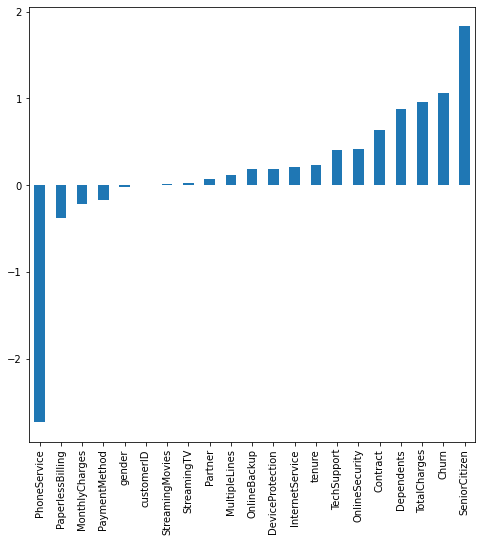

In [191]:
plt.figure(figsize=(8,8))
plt.grid(True)
df1.skew().sort_values().plot(kind='bar')
plt.show()

CHECKING THE CORRELATION  AMONG THE FEATURES AND THE LABEL!!
-------------------

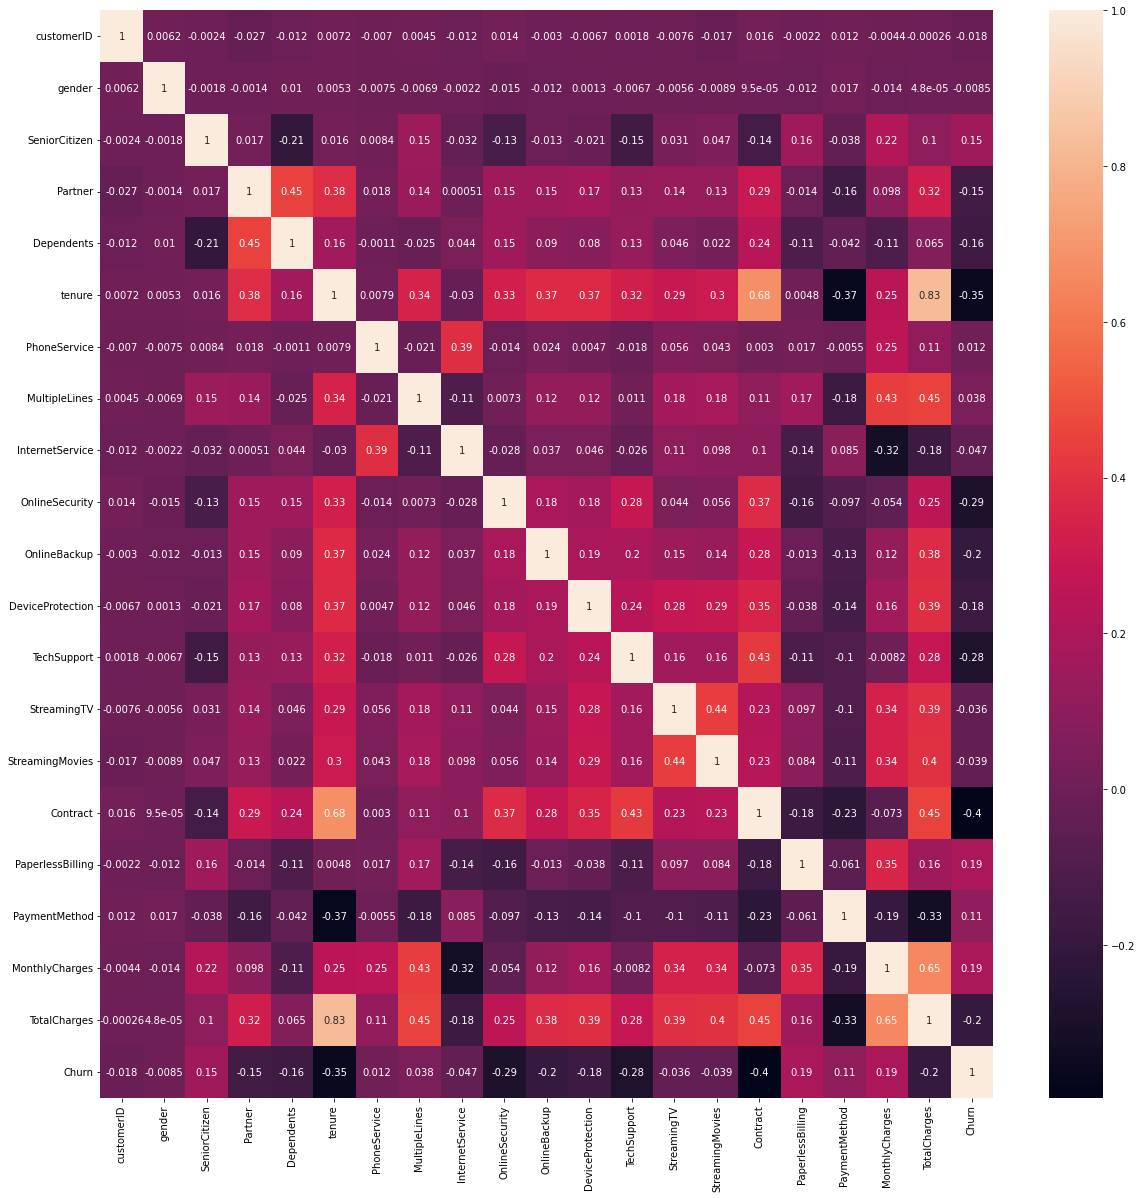

In [192]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,annot_kws={"size":10})
plt.show()

CORRELATION OF THE TOTAL CHARGES WITH THE FEATURES!!
-------------

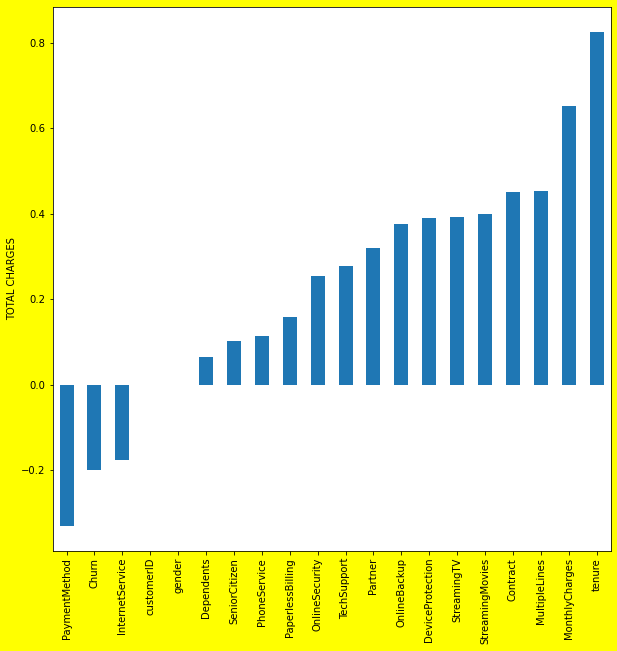

In [193]:
plt.figure(figsize=(10,10),facecolor='Yellow')
plt.ylabel("TOTAL CHARGES")
df1.corr()['TotalCharges'].sort_values().drop(['TotalCharges']).plot(kind='bar')
plt.show()

TENURE CAN BE SEEN HAVING THE HIGHEST POSITIVE CORRELATION WITH THE TOTAL CHARGES<BR>
MonthlyCharges may show multicollienarity with the total charges<br>
MultipleLines and contract are showing significant correlation with TotalCharges too!!

CHURN CORRELATION WITH OTHER FEATURES!!
-----------------

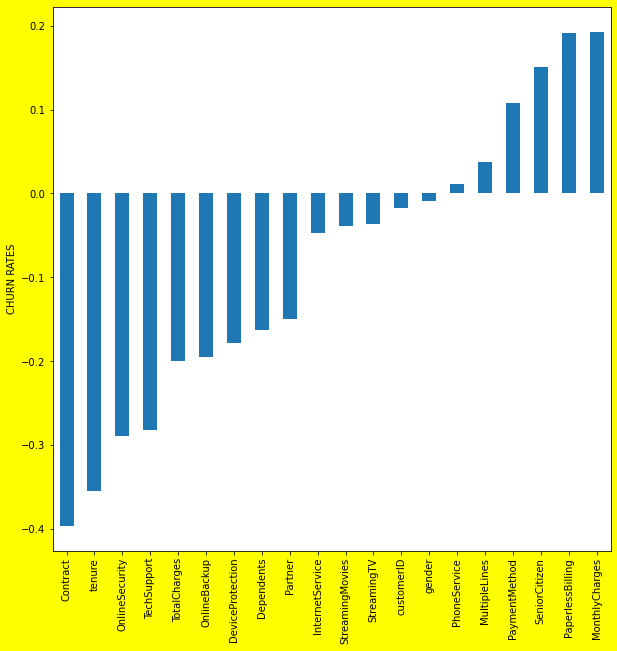

In [194]:
plt.figure(figsize=(10,10),facecolor='Yellow')
plt.ylabel("CHURN RATES")
df1.corr()['Churn'].sort_values().drop(['Churn']).plot(kind='bar')
plt.show()

The Contract type can be seen having the highest negative correlation with the churn rates!!<br>
More in contract duration less are the churn rates!!<br>
MonthlyCharges also can be seen having the highest positive correlation with the churn rates as the charges increases customers tends to shift to other service providers more!!<br>


In [195]:
df2=df1.copy()

In [196]:
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3953.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2558.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5524.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6500.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,4843.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7028,1524.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7029,3358.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7030,5923.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [197]:
x_scaled=df2.drop(['Churn'],axis=1)
y=df2['Churn']

DATA STANDARDISATION USING POWER TRANSFORMER!!
--------------

In [198]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()


In [199]:
x_scaled=pd.DataFrame(pt.fit_transform(x_scaled),columns=x_scaled.columns)

In [200]:
x_scaled

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.900822,-1.009430,-0.440327,1.035617,-0.652305,-1.649511,-3.056334,0.334563,-1.252966,-0.976139,1.162109,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,0.411006,-1.159996,-1.810069
1,0.298897,0.990658,-0.440327,-0.965608,-0.652305,0.294467,0.327189,-1.014958,-1.252966,1.259119,-1.077862,1.163715,-0.982173,-1.150680,-1.158211,0.794340,-1.206361,1.320478,-0.241345,0.254257
2,-0.362450,0.990658,-0.440327,-0.965608,-0.652305,-1.500657,0.327189,-1.014958,-1.252966,1.259119,1.162109,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,1.320478,-0.344532,-1.386091
3,0.965492,0.990658,-0.440327,-0.965608,-0.652305,0.644481,-3.056334,0.334563,-1.252966,1.259119,-1.077862,1.163715,1.253025,-1.150680,-1.158211,0.794340,-1.206361,-1.489780,-0.732875,0.233220
4,1.351270,-1.009430,-0.440327,-0.965608,-0.652305,-1.500657,0.327189,-1.014958,0.290614,-0.976139,-1.077862,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,0.411006,0.211884,-1.248808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.684433,0.990658,-0.440327,1.035617,1.533025,-0.081666,0.327189,1.081271,-1.252966,1.259119,-1.077862,1.163715,1.253025,1.099593,1.093428,0.794340,0.828939,1.320478,0.670240,0.296583
7028,-0.924997,-1.009430,-0.440327,1.035617,1.533025,1.342400,0.327189,1.081271,0.290614,-0.976139,1.162109,1.163715,-0.982173,1.099593,1.093428,0.794340,0.828939,-0.521258,1.260454,1.565846
7029,0.026898,-1.009430,-0.440327,1.035617,1.533025,-0.729812,-3.056334,0.334563,-1.252966,1.259119,-1.077862,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,0.411006,-1.168685,-0.858393
7030,1.125431,0.990658,2.271039,1.035617,-0.652305,-1.270304,0.327189,1.081271,0.290614,-0.976139,-1.077862,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,1.320478,0.332737,-0.921477


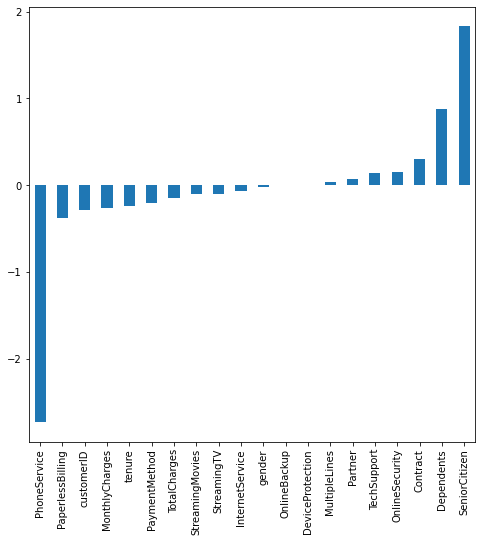

In [201]:
plt.figure(figsize=(8,8))
plt.grid(True)
x_scaled.skew().sort_values().plot(kind='bar')
plt.show()

SKEWNESS CAN BE SEEN REDUCED FOR SOME COLUMNS!!

In [202]:
df3=pd.concat([x_scaled,y],axis=1)

In [203]:
df3

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.900822,-1.009430,-0.440327,1.035617,-0.652305,-1.649511,-3.056334,0.334563,-1.252966,-0.976139,...,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,0.411006,-1.159996,-1.810069,0.0
1,0.298897,0.990658,-0.440327,-0.965608,-0.652305,0.294467,0.327189,-1.014958,-1.252966,1.259119,...,1.163715,-0.982173,-1.150680,-1.158211,0.794340,-1.206361,1.320478,-0.241345,0.254257,0.0
2,-0.362450,0.990658,-0.440327,-0.965608,-0.652305,-1.500657,0.327189,-1.014958,-1.252966,1.259119,...,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,1.320478,-0.344532,-1.386091,1.0
3,0.965492,0.990658,-0.440327,-0.965608,-0.652305,0.644481,-3.056334,0.334563,-1.252966,1.259119,...,1.163715,1.253025,-1.150680,-1.158211,0.794340,-1.206361,-1.489780,-0.732875,0.233220,0.0
4,1.351270,-1.009430,-0.440327,-0.965608,-0.652305,-1.500657,0.327189,-1.014958,0.290614,-0.976139,...,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,0.411006,0.211884,-1.248808,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.684433,0.990658,-0.440327,1.035617,1.533025,-0.081666,0.327189,1.081271,-1.252966,1.259119,...,1.163715,1.253025,1.099593,1.093428,0.794340,0.828939,1.320478,0.670240,0.296583,0.0
7028,-0.924997,-1.009430,-0.440327,1.035617,1.533025,1.342400,0.327189,1.081271,0.290614,-0.976139,...,1.163715,-0.982173,1.099593,1.093428,0.794340,0.828939,-0.521258,1.260454,1.565846,0.0
7029,0.026898,-1.009430,-0.440327,1.035617,1.533025,-0.729812,-3.056334,0.334563,-1.252966,1.259119,...,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,0.411006,-1.168685,-0.858393,0.0
7030,1.125431,0.990658,2.271039,1.035617,-0.652305,-1.270304,0.327189,1.081271,0.290614,-0.976139,...,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,1.320478,0.332737,-0.921477,1.0


CHECKING FOR THE OULIERS!!
-------------

In [204]:
df_new=df3.copy()

In [205]:
df3.shape

(7032, 21)

In [206]:
from scipy.stats import zscore

In [207]:
z_score=np.abs(zscore(df3))

In [208]:
df_new=df3[(z_score<3).all(axis=1)]

In [209]:
df_new.shape

(6352, 21)

In [210]:
print(f'PERCENT LOSS AFTER OUTLIER REMOVAL IS {round((7032-6352)/7032*100,2)}')

PERCENT LOSS AFTER OUTLIER REMOVAL IS 9.67


SINCE THE LOSS IS LESS THAN 10% WE CAN CONTINUE WITH THESE REMOVED OUTLIERS AND NEW DATASET!!

<b>SPILTTING THE DATSET INTO x_scaled (all the features ) and y (label)

In [211]:
x_scaled=df_new.drop(['Churn'],axis=1)

In [212]:
y=df_new['Churn']

CHECKING FOR THE MULTICOLLINEARITY ISSUE!!
--------------------

In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [214]:
vif=pd.DataFrame()

In [215]:
vif['FEATURES']=x_scaled.columns

vif['SCORES']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

In [216]:
vif

,FEATURES,SCORES
0,customerID,1.003035
1,gender,1.001941
2,SeniorCitizen,1.152824
3,Partner,1.470069
4,Dependents,1.382245
5,tenure,41.598525
6,PhoneService,1.061631
7,MultipleLines,1.409468
8,InternetService,1.583245
9,OnlineSecurity,1.349942


HIGH MULTICOLIINEARITY CAN BE SEEN WITHIN SOME FEATURES!!<BR>
TotalCharges,MonthlyCharges,tenure<br>
Since monthy charges have high positive correlation with the churn rates we cant drop it!!
Rather than dropping the total charges as its correlation with the churn rates is similar as with monthly charges and dropping it would not affect the churn rates determination

In [217]:
x_s=x_scaled.drop(['TotalCharges'],axis=1)

In [218]:
vif=pd.DataFrame()

In [219]:
vif['FEATURES']=x_s.columns

vif['SCORES']=[variance_inflation_factor(x_s,i) for i in range (x_s.shape[1])]

In [220]:
vif

,FEATURES,SCORES
0,customerID,1.002993
1,gender,1.001907
2,SeniorCitizen,1.152771
3,Partner,1.470069
4,Dependents,1.382177
5,tenure,2.664163
6,PhoneService,1.061616
7,MultipleLines,1.409179
8,InternetService,1.439338
9,OnlineSecurity,1.343890


AS WE CAN SEE ALL THE SCORES HAVE VALUE <5 WE CAN ASSURE THAT OUR FEATURES ARE FREE FROM MULTI-COLLINEARITY ISSUE

In [221]:
x_scaled=x_s.copy()

In [222]:
x_scaled.shape

(6352, 19)

DROPPING CUSTOMERID AS ITS NOTHING BUT THE SEQUENCE AND HAVE 6352 UNIQUE VALUES WITH ALMOST NIL CORRELATION WITH THE CHURN RATES!!

In [223]:
x_scaled.drop(['customerID'],axis=1,inplace=True)

In [224]:
x_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1,0.990658,-0.440327,-0.965608,-0.652305,0.294467,0.327189,-1.014958,-1.252966,1.259119,-1.077862,1.163715,-0.982173,-1.150680,-1.158211,0.794340,-1.206361,1.320478,-0.241345
2,0.990658,-0.440327,-0.965608,-0.652305,-1.500657,0.327189,-1.014958,-1.252966,1.259119,1.162109,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,1.320478,-0.344532
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.500657,0.327189,-1.014958,0.290614,-0.976139,-1.077862,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,0.411006,0.211884
5,-1.009430,-0.440327,-0.965608,-0.652305,-0.931213,0.327189,1.081271,0.290614,-0.976139,-1.077862,1.163715,-0.982173,1.099593,1.093428,-0.887124,0.828939,0.411006,1.147203
6,0.990658,-0.440327,-0.965608,1.533025,-0.166449,0.327189,1.081271,0.290614,-0.976139,1.162109,-1.076071,-0.982173,1.099593,-1.158211,-0.887124,0.828939,-0.521258,0.808914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,-1.009430,-0.440327,-0.965608,-0.652305,1.342400,0.327189,-1.014958,1.399622,0.576600,0.335029,0.339145,0.561798,0.171091,0.154495,1.346194,0.828939,-1.489780,-1.465681
7027,0.990658,-0.440327,1.035617,1.533025,-0.081666,0.327189,1.081271,-1.252966,1.259119,-1.077862,1.163715,1.253025,1.099593,1.093428,0.794340,0.828939,1.320478,0.670240
7028,-1.009430,-0.440327,1.035617,1.533025,1.342400,0.327189,1.081271,0.290614,-0.976139,1.162109,1.163715,-0.982173,1.099593,1.093428,0.794340,0.828939,-0.521258,1.260454
7030,0.990658,2.271039,1.035617,-0.652305,-1.270304,0.327189,1.081271,0.290614,-0.976139,-1.077862,-1.076071,-0.982173,-1.150680,-1.158211,-0.887124,0.828939,1.320478,0.332737


MODEL 1) LOGISTIC REGRESSION
-----------------

<B> IMPORTING NECESSARY LIBRARIES

In [225]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

USING FOR LOOP TO ITERATE WITH DIFFERENT RANDOM_STATES AND SELECTING THE RANDOM STATE WITH HIGH TRAINING AND TESTING ACCURACY

In [226]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=accuracy_score(y_train,lr_train_pred)
    lr_test_accuracy=accuracy_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}  --AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 16


TRAINING ACCURACY IS -80.61  --AND TESTING ACCURACY IS 80.65


AT RANDOM STATE-- 36


TRAINING ACCURACY IS -80.48  --AND TESTING ACCURACY IS 80.49


AT RANDOM STATE-- 49


TRAINING ACCURACY IS -80.69  --AND TESTING ACCURACY IS 80.72


AT RANDOM STATE-- 69


TRAINING ACCURACY IS -80.75  --AND TESTING ACCURACY IS 80.8


AT RANDOM STATE-- 110


TRAINING ACCURACY IS -80.52  --AND TESTING ACCURACY IS 80.49


AT RANDOM STATE-- 173


TRAINING ACCURACY IS -80.69  --AND TESTING ACCURACY IS 80.72


AT RANDOM STATE-- 209


TRAINING ACCURACY IS -80.5  --AND TESTING ACCURACY IS 80.49


AT RANDOM STATE-- 216


TRAINING ACCURACY IS -80.59  --AND TESTING ACCURACY IS 80.57


AT RANDOM STATE-- 256


TRAINING ACCURACY IS -80.59  --AND TESTING ACCURACY IS 80.57


AT RANDOM STATE-- 270


TRAINING ACCURACY IS -80.71  --AND TESTING ACCURACY IS 80.72


AT RANDOM STATE-- 325


TRAINING ACCURACY IS -80.57  --AND TESTING ACCURACY IS 80.65


AT RANDOM STATE-- 328


TRAINING ACCURACY IS -8

SELECTING THE RANDOM STATE AS 511

In [227]:
ran=511

In [228]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=511)

In [229]:
def score(mod,x_train,x_test,y_train,y_test,train):
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=accuracy_score(y_train,y_pred)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TRAINIG')
        print('\n\n',confusion_matrix(y_train,y_pred))
        print('\n\nCLASSIFICATION REPORT for training --')
        print('\n\n',classification_report(y_train,y_pred))
        
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TESTING')
        print('\n\n',confusion_matrix(y_test,y_pred))
        print('\n\nCLASSIFICATION REPORT for testing --')
        print('\n\n',classification_report(y_test,y_pred))

In [230]:
lr=LogisticRegression()

In [231]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression() is 80.79


CONFUSION MATRIX FOR THE TRAINIG


 [[3371  353]
 [ 623  734]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      3724
         1.0       0.68      0.54      0.60      1357

    accuracy                           0.81      5081
   macro avg       0.76      0.72      0.74      5081
weighted avg       0.80      0.81      0.80      5081



Testing SCORE FOR THE LogisticRegression() is 80.8


CONFUSION MATRIX FOR THE TESTING


 [[833  96]
 [148 194]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       929
         1.0       0.67      0.57      0.61       342

    accuracy                           0.81      1271
   macro avg       0.76      0.73      0.74      1271
weighted avg       0.80      0.81      0.80      1271



In [232]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
for i in range(2,11):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\nAT CV =',i)
    print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
    print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)      
    print('-------------')


AT CV = 2

CROSS VAL SCORE IS  80.42

TEST ACCURACY SCORE IS  80.8
-------------

AT CV = 3

CROSS VAL SCORE IS  80.68

TEST ACCURACY SCORE IS  80.8
-------------

AT CV = 4

CROSS VAL SCORE IS  80.53

TEST ACCURACY SCORE IS  80.8
-------------

AT CV = 5

CROSS VAL SCORE IS  80.48

TEST ACCURACY SCORE IS  80.8
-------------

AT CV = 6

CROSS VAL SCORE IS  80.51

TEST ACCURACY SCORE IS  80.8
-------------

AT CV = 7

CROSS VAL SCORE IS  80.56

TEST ACCURACY SCORE IS  80.8
-------------

AT CV = 8

CROSS VAL SCORE IS  80.43

TEST ACCURACY SCORE IS  80.8
-------------

AT CV = 9

CROSS VAL SCORE IS  80.54

TEST ACCURACY SCORE IS  80.8
-------------

AT CV = 10

CROSS VAL SCORE IS  80.6

TEST ACCURACY SCORE IS  80.8
-------------


TAKING CV=4 as the difference between the cross val score and the testing scores is considerably small !!

Model shows good training and testing scores and the  low difference between the cross val score and the testing accuracy score implies model dose not overfit and can be considered as a good one!!

MODEL 2)---DECISION TREE MODELING
----------------------

In [233]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [234]:
dt=DecisionTreeClassifier()

In [235]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [236]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier() is 99.74


CONFUSION MATRIX FOR THE TRAINIG


 [[3722    2]
 [  11 1346]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3724
         1.0       1.00      0.99      1.00      1357

    accuracy                           1.00      5081
   macro avg       1.00      1.00      1.00      5081
weighted avg       1.00      1.00      1.00      5081



Testing SCORE FOR THE DecisionTreeClassifier() is 72.7


CONFUSION MATRIX FOR THE TESTING


 [[760 169]
 [178 164]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       929
         1.0       0.49      0.48      0.49       342

    accuracy                           0.73      1271
   macro avg       0.65      0.65      0.65      1271
weighted avg       0.72      0.73      0.73      1271



Large differences between the testing score and training score calls for the need of hyper parameter tuning !!

Hyper Parameter tuning
---------------------

In [237]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [238]:
para={'criterion':['gini','entropy','log_loss'],
      'max_depth':np.arange(18,25),
      'min_samples_split':np.arange(4,7),
      'min_samples_leaf':np.arange(6,10)}

dgsc=GridSearchCV(dt,param_grid=para,cv=4)

dgsc.fit(x_train,y_train)

dgsc.best_params_

dt=dgsc.best_estimator_

In [239]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(max_depth=22, min_samples_leaf=9, min_samples_split=5) is 85.4


CONFUSION MATRIX FOR THE TRAINIG


 [[3461  263]
 [ 479  878]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      3724
         1.0       0.77      0.65      0.70      1357

    accuracy                           0.85      5081
   macro avg       0.82      0.79      0.80      5081
weighted avg       0.85      0.85      0.85      5081



Testing SCORE FOR THE DecisionTreeClassifier(max_depth=22, min_samples_leaf=9, min_samples_split=5) is 77.03


CONFUSION MATRIX FOR THE TESTING


 [[814 115]
 [177 165]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       929
         1.0       0.59      0.48      0.53       342

    accuracy                           0.77      1271
   macro avg       0.7

In [243]:
test_pred=dt.predict(x_test)
train_pred=dt.predict(x_train)
dt_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
dt_train_accuracy=round(accuracy_score(y_train,train_pred)*100,2)

In [244]:
cross_val=cross_val_score(dt,x_scaled,y,cv=4).mean()

In [246]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",dt_test_accuracy)
print("\nTRAINING ACCURACY SCORE IS ",dt_train_accuracy)


CROSS VAL SCORE IS  77.14

TEST ACCURACY SCORE IS  77.03

TRAINING ACCURACY SCORE IS  85.4


REDUCED DIFFERENCES BETWEEN TRAINING AND TESTING SCORES<BR>
SINCE THE CROSS VAL SCORES ARE CLOSE TO TESTING ACCURACY SCORE ITS VERY CLEAR THAT OUR MODEL DOES NOT OVERFIT!!

MODEL 3) RANDOM FOREST CLASSIFIER
--------------

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
rfc=RandomForestClassifier()

In [249]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [250]:
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)

In [251]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier() is 99.74


CONFUSION MATRIX FOR THE TRAINIG


 [[3716    8]
 [   5 1352]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3724
         1.0       0.99      1.00      1.00      1357

    accuracy                           1.00      5081
   macro avg       1.00      1.00      1.00      5081
weighted avg       1.00      1.00      1.00      5081



Testing SCORE FOR THE RandomForestClassifier() is 77.66


CONFUSION MATRIX FOR THE TESTING


 [[818 111]
 [173 169]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       929
         1.0       0.60      0.49      0.54       342

    accuracy                           0.78      1271
   macro avg       0.71      0.69      0.70      1271
weighted avg       0.77      0.78      0.77      1271



HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER --------------------------

In [252]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [260]:
rfc=RandomForestClassifier()

In [264]:
parma={"n_estimators":[50,55,58,62,68],
       "min_samples_split":[3,5,6],
       "random_state":[165,230,610,211],
       "min_samples_leaf":[3,5]
       }

In [265]:
rgsc=GridSearchCV(rfc,param_grid=parma)

In [266]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5, 6],
                         'n_estimators': [50, 55, 58, 62, 68],
                         'random_state': [165, 230, 610, 211]})

In [267]:
rgsc.best_params_

{'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 55,
 'random_state': 165}

In [268]:
rfc=rgsc.best_estimator_

In [269]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier(min_samples_leaf=5, min_samples_split=3, n_estimators=55,
                       random_state=165) is 86.18


CONFUSION MATRIX FOR THE TRAINIG


 [[3516  208]
 [ 494  863]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      3724
         1.0       0.81      0.64      0.71      1357

    accuracy                           0.86      5081
   macro avg       0.84      0.79      0.81      5081
weighted avg       0.86      0.86      0.86      5081



Testing SCORE FOR THE RandomForestClassifier(min_samples_leaf=5, min_samples_split=3, n_estimators=55,
                       random_state=165) is 80.09


CONFUSION MATRIX FOR THE TESTING


 [[840  89]
 [164 178]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       929
         1.0       0.67      0.52      0.5

As we can see the testing score has increased from 77 to 80.09 and the difference has reduced between training and testing scores we can consider these parameters for random forest classifier!!

In [270]:
test_pred=rfc.predict(x_test)
train_pred=rfc.predict(x_train)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
rfc_train_accuracy=round(accuracy_score(y_train,train_pred)*100,2)
cross_val=cross_val_score(rfc,x_scaled,y,cv=4).mean()

In [303]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)
print("\nTRAIN ACCURACY IS ",rfc_train_accuracy)


CROSS VAL SCORE IS  79.79

TEST ACCURACY SCORE IS  80.09

TRAIN ACCURACY IS  86.18


MODEL 4)-BAGGING CLASSIFIER
---------------------------------------------------------

In [272]:
from sklearn.ensemble import BaggingClassifier

In [273]:
bc=BaggingClassifier()

In [274]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier() is 98.11


CONFUSION MATRIX FOR THE TRAINIG


 [[3710   14]
 [  82 1275]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3724
         1.0       0.99      0.94      0.96      1357

    accuracy                           0.98      5081
   macro avg       0.98      0.97      0.98      5081
weighted avg       0.98      0.98      0.98      5081



Testing SCORE FOR THE BaggingClassifier() is 76.79


CONFUSION MATRIX FOR THE TESTING


 [[826 103]
 [192 150]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       929
         1.0       0.59      0.44      0.50       342

    accuracy                           0.77      1271
   macro avg       0.70      0.66      0.68      1271
weighted avg       0.75      0.77      0.76      1271



HYPER PARAMETER TUNING FOR BAGGING CLASSIFIER
-----------------

In [275]:
bc=BaggingClassifier()

In [276]:
par={"n_estimators":[80,120,180,250],
    "oob_score":[True,False],
    "random_state":[200,411,211,224],
    }

In [277]:
bcgs=GridSearchCV(bc,param_grid=par)

In [278]:
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': [80, 120, 180, 250],
                         'oob_score': [True, False],
                         'random_state': [200, 411, 211, 224]})

In [279]:
bcgs.best_params_

{'n_estimators': 180, 'oob_score': True, 'random_state': 411}

In [280]:
bc=bcgs.best_estimator_

In [281]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier(n_estimators=180, oob_score=True, random_state=411) is 99.74


CONFUSION MATRIX FOR THE TRAINIG


 [[3717    7]
 [   6 1351]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3724
         1.0       0.99      1.00      1.00      1357

    accuracy                           1.00      5081
   macro avg       1.00      1.00      1.00      5081
weighted avg       1.00      1.00      1.00      5081



Testing SCORE FOR THE BaggingClassifier(n_estimators=180, oob_score=True, random_state=411) is 77.5


CONFUSION MATRIX FOR THE TESTING


 [[818 111]
 [175 167]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       929
         1.0       0.60      0.49      0.54       342

    accuracy                           0.77      1271
   macro avg       0.71      0.68     

AGAIN HYPER PARAMETER TUNING FOR BAGGING CLASSIFIER
-----------------

In [282]:
BC=BaggingClassifier()

In [283]:
BC.get_params().keys()

dict_keys(['base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [284]:
par={"n_estimators":[50,60,65,72,75],
    "oob_score":[True,False],
    "random_state":[200,411,211,224],
    }

In [287]:
Bcgs=GridSearchCV(BC,param_grid=par)

In [288]:
Bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': [50, 60, 65, 72, 75],
                         'oob_score': [True, False],
                         'random_state': [200, 411, 211, 224]})

In [289]:
Bcgs.best_params_

{'n_estimators': 60, 'oob_score': True, 'random_state': 211}

In [290]:
BC=Bcgs.best_estimator_

In [291]:
score(BC,x_train,x_test,y_train,y_test,train=True)
score(BC,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier(n_estimators=60, oob_score=True, random_state=211) is 99.74


CONFUSION MATRIX FOR THE TRAINIG


 [[3718    6]
 [   7 1350]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3724
         1.0       1.00      0.99      1.00      1357

    accuracy                           1.00      5081
   macro avg       1.00      1.00      1.00      5081
weighted avg       1.00      1.00      1.00      5081



Testing SCORE FOR THE BaggingClassifier(n_estimators=60, oob_score=True, random_state=211) is 77.73


CONFUSION MATRIX FOR THE TESTING


 [[822 107]
 [176 166]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       929
         1.0       0.61      0.49      0.54       342

    accuracy                           0.78      1271
   macro avg       0.72      0.69      

SINCE THE DIFFERENCE BETWEEN THE TWO IS ALWAYS SAME WE CAN CONSIDER ANY OF THE PARAMETERS!!

MODEL 5)----KNN
-----------------------------

In [292]:
from sklearn.neighbors import KNeighborsClassifier

In [293]:
knn=KNeighborsClassifier()

In [294]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [295]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier() is 83.88


CONFUSION MATRIX FOR THE TRAINIG


 [[3392  332]
 [ 487  870]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      3724
         1.0       0.72      0.64      0.68      1357

    accuracy                           0.84      5081
   macro avg       0.80      0.78      0.79      5081
weighted avg       0.83      0.84      0.84      5081



Testing SCORE FOR THE KNeighborsClassifier() is 75.14


CONFUSION MATRIX FOR THE TESTING


 [[790 139]
 [177 165]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       929
         1.0       0.54      0.48      0.51       342

    accuracy                           0.75      1271
   macro avg       0.68      0.67      0.67      1271
weighted avg       0.74      0.75      0.75      1271



HYPER PARAMETER TUNING THE PARAMETERS

In [296]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [297]:
knn=KNeighborsClassifier()

In [298]:
pop={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':np.arange(3,6),
    'leaf_size':[25,28,30,32,35,38]}

In [299]:
kgsc=GridSearchCV(knn,param_grid=pop)

In [300]:
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 28, 30, 32, 35, 38],
                         'n_neighbors': array([3, 4, 5])})

In [301]:
kgsc.best_params_
knn=kgsc.best_estimator_

In [302]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier(algorithm='ball_tree', leaf_size=25) is 83.88


CONFUSION MATRIX FOR THE TRAINIG


 [[3392  332]
 [ 487  870]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      3724
         1.0       0.72      0.64      0.68      1357

    accuracy                           0.84      5081
   macro avg       0.80      0.78      0.79      5081
weighted avg       0.83      0.84      0.84      5081



Testing SCORE FOR THE KNeighborsClassifier(algorithm='ball_tree', leaf_size=25) is 75.14


CONFUSION MATRIX FOR THE TESTING


 [[790 139]
 [177 165]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       929
         1.0       0.54      0.48      0.51       342

    accuracy                           0.75      1271
   macro avg       0.68      0.67      0.67      1271
weighte

In [304]:
test_pred=knn.predict(x_test)
train_pred=knn.predict(x_train)
knn_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
knn_train_accuracy=round(accuracy_score(y_train,train_pred)*100,2)
cross_val=cross_val_score(knn,x_scaled,y,cv=4).mean()

In [305]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",knn_test_accuracy)
print("\nTrain Accuracy score is ",knn_train_accuracy)


CROSS VAL SCORE IS  75.43

TEST ACCURACY SCORE IS  75.14

Train Accuracy score is  83.88


MODEL 6)-----SVC-----------
-----------------------

In [306]:
from sklearn.svm import SVC

In [307]:
svc=SVC()

In [308]:
svc.fit(x_train,y_train)

SVC()

In [309]:
score(svc,x_train,x_test,y_train,y_test,train=True)
score(svc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVC() is 82.35


CONFUSION MATRIX FOR THE TRAINIG


 [[3454  270]
 [ 627  730]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      3724
         1.0       0.73      0.54      0.62      1357

    accuracy                           0.82      5081
   macro avg       0.79      0.73      0.75      5081
weighted avg       0.82      0.82      0.81      5081



Testing SCORE FOR THE SVC() is 78.99


CONFUSION MATRIX FOR THE TESTING


 [[839  90]
 [177 165]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       929
         1.0       0.65      0.48      0.55       342

    accuracy                           0.79      1271
   macro avg       0.74      0.69      0.71      1271
weighted avg       0.78      0.79      0.78      1271



In [314]:
test_pred=svc.predict(x_test)
train_pred=svc.predict(x_train)
svc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
svc_train_accuracy=round(accuracy_score(y_train,train_pred)*100,2)
cross_val=cross_val_score(svc,x_scaled,y,cv=4).mean()

In [311]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",svc_test_accuracy)
print("\nTRAIN ACCURACY SCORE IS ",svc_train_accuracy)


CROSS VAL SCORE IS  80.02

TEST ACCURACY SCORE IS  78.99

TRAIN ACCURACY SCORE IS  82.35


CLOSER VALUES OF ALL THE SCORES DEFINE IT AS A GOOD MODEL!!

MODEL 7) ADABOOST CLASSIFIER-
----------------------

In [312]:
from sklearn.ensemble import AdaBoostClassifier

In [313]:
adc=AdaBoostClassifier()

In [315]:
adc.fit(x_train,y_train)

AdaBoostClassifier()

In [316]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier() is 80.89


CONFUSION MATRIX FOR THE TRAINIG


 [[3362  362]
 [ 609  748]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      3724
         1.0       0.67      0.55      0.61      1357

    accuracy                           0.81      5081
   macro avg       0.76      0.73      0.74      5081
weighted avg       0.80      0.81      0.80      5081



Testing SCORE FOR THE AdaBoostClassifier() is 80.09


CONFUSION MATRIX FOR THE TESTING


 [[834  95]
 [158 184]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       929
         1.0       0.66      0.54      0.59       342

    accuracy                           0.80      1271
   macro avg       0.75      0.72      0.73      1271
weighted avg       0.79      0.80      0.79      1271



------HYPER PARAMETER TUNING FOR ADABOOST CLASSIFIER-----------------

In [317]:
adc.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [318]:
adc=AdaBoostClassifier()

In [319]:
param={"algorithm":['SAMME', 'SAMME.R'],
      'n_estimators':np.arange(60,70),
      'random_state':[121,234,345,389,567]}

In [320]:
adgs=GridSearchCV(adc,param_grid=param)

In [321]:
adgs.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
                         'random_state': [121, 234, 345, 389, 567]})

In [322]:
adgs.best_params_

{'algorithm': 'SAMME', 'n_estimators': 60, 'random_state': 121}

In [323]:
adc=adgs.best_estimator_

In [324]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=60, random_state=121) is 80.3


CONFUSION MATRIX FOR THE TRAINIG


 [[3361  363]
 [ 638  719]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      3724
         1.0       0.66      0.53      0.59      1357

    accuracy                           0.80      5081
   macro avg       0.75      0.72      0.73      5081
weighted avg       0.79      0.80      0.80      5081



Testing SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=60, random_state=121) is 79.31


CONFUSION MATRIX FOR THE TESTING


 [[825 104]
 [159 183]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       929
         1.0       0.64      0.54      0.58       342

    accuracy                           0.79      1271
   macro avg       0.74      0.7

DEFALUT PARAMETERS WERE GOOD !!

In [326]:
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier() is 80.89


CONFUSION MATRIX FOR THE TRAINIG


 [[3362  362]
 [ 609  748]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      3724
         1.0       0.67      0.55      0.61      1357

    accuracy                           0.81      5081
   macro avg       0.76      0.73      0.74      5081
weighted avg       0.80      0.81      0.80      5081



Testing SCORE FOR THE AdaBoostClassifier() is 80.09


CONFUSION MATRIX FOR THE TESTING


 [[834  95]
 [158 184]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       929
         1.0       0.66      0.54      0.59       342

    accuracy                           0.80      1271
   macro avg       0.75      0.72      0.73      1271
weighted avg       0.79      0.80      0.79      1271



------------PLOTTING ROC CURVES FOR BOTH TESTING AND TRAINIG------------
---

In [327]:
from sklearn.metrics import plot_roc_curve

ROC CURVE FOR TRAINING

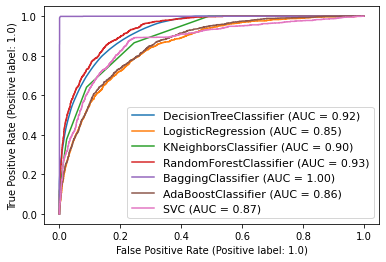

In [328]:
disp=plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(adc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

ROC CURVE FOR TESTING

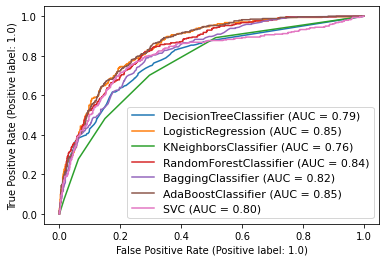

In [329]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

CONCLUSION-<BR>
 -----------
SINCE FOR LOGISTIC REGRESSION THE AUC IS  SAME FOR BOTH TRAINING AND TESTING AND THE DIFFERENCE BETWEEN THE CROSS VAL SCORE AND THE TESTING ACCURACY SCORE IS THE LOWEST WE WILL CHOOSE "LOGISTIC REGRESSION " AS OUR FINAL MODEL <BR>
False negatives are less in comparison to ADABOOSTCLASSIFIER MODEL GIVING IT A EDGE OVER IT!! 


In [330]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression() is 80.79


CONFUSION MATRIX FOR THE TRAINIG


 [[3371  353]
 [ 623  734]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      3724
         1.0       0.68      0.54      0.60      1357

    accuracy                           0.81      5081
   macro avg       0.76      0.72      0.74      5081
weighted avg       0.80      0.81      0.80      5081



Testing SCORE FOR THE LogisticRegression() is 80.8


CONFUSION MATRIX FOR THE TESTING


 [[833  96]
 [148 194]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       929
         1.0       0.67      0.57      0.61       342

    accuracy                           0.81      1271
   macro avg       0.76      0.73      0.74      1271
weighted avg       0.80      0.81      0.80      1271



In [331]:
test_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
lr_train_accuracy=round(accuracy_score(y_train,train_pred)*100,2)
cross_val=cross_val_score(lr,x_scaled,y,cv=4).mean()

In [332]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)
print("\nTRAIN ACCURACY SCORE IS ",lr_train_accuracy)


CROSS VAL SCORE IS  80.53

TEST ACCURACY SCORE IS  80.8

TRAIN ACCURACY SCORE IS  80.79


SAVING THE MODEL
------------------

In [333]:
import pickle

In [334]:
with open('churn_class', 'wb') as files:
    pickle.dump(lr, files)